Albert Gabriel Tuwan - 2502001353

In [1]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Upload the data to the folder first
df_raw = pd.read_excel('diabetes.xlsx')
df_raw.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df_raw.info()
df_raw.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

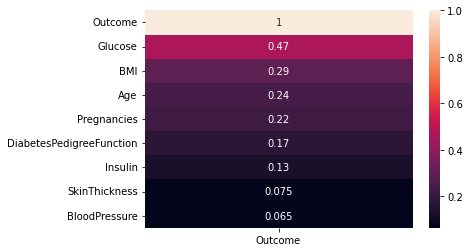

In [12]:
df_corr = df_raw.corr()[['Outcome']].sort_values(by = 'Outcome', ascending = False)
plt.figure(figsize = (6, 4))
sns.heatmap(df_corr, annot = True)

<Axes: >

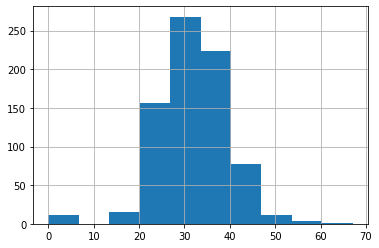

In [13]:
df_raw['BMI'].hist()

<Axes: >

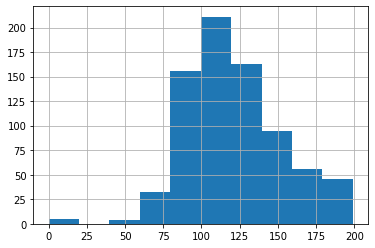

In [14]:
df_raw['Glucose'].hist()

<Axes: >

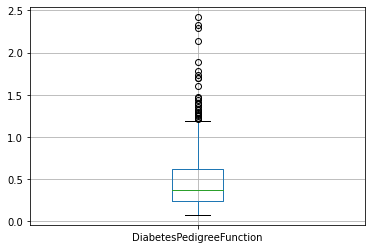

In [16]:
df_raw[['DiabetesPedigreeFunction']].boxplot()

In [19]:
for i in ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI']:
  print('{}: {}'.format(i, df_raw[i].value_counts()[0]))

Glucose: 5
BloodPressure: 35
SkinThickness: 227
BMI: 11


In [22]:
df_clean = df_raw[(df_raw['Glucose'] != 0)
& (df_raw['BloodPressure'] != 0)
& (df_raw['BMI'] != 0)]
df_clean.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000
mean,3.866022,121.882597,72.400552,21.443370,84.494475,32.467127,0.474765,33.350829,0.343923
std,3.362803,30.750030,12.379870,15.732756,117.016513,6.888941,0.332315,11.765393,0.475344
min,0.000000,44.000000,24.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,0.000000,0.000000,27.500000,0.245000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,24.000000,48.000000,32.400000,0.379000,29.000000,0.000000
75%,6.000000,142.000000,80.000000,33.000000,130.500000,36.600000,0.627500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [102]:
mean = df_clean[df_clean['SkinThickness'] != 0].mean()['SkinThickness']
df_clean2 = df_clean.copy()
df_clean2['SkinThickness'].replace(0, mean, inplace = True)
df_clean2.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000
mean,3.866022,121.882597,72.400552,29.182331,84.494475,32.467127,0.474765,33.350829,0.343923
std,3.362803,30.750030,12.379870,9.018907,117.016513,6.888941,0.332315,11.765393,0.475344
min,0.000000,44.000000,24.000000,7.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,0.000000,27.500000,0.245000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.182331,48.000000,32.400000,0.379000,29.000000,0.000000
75%,6.000000,142.000000,80.000000,33.000000,130.500000,36.600000,0.627500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [103]:
# Create Checkpoint
df_fin_clean = df_clean2

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [105]:
x_train, x_val, y_train, y_val = train_test_split(
    df_fin_clean.drop('Outcome', axis = 1),
    df_fin_clean['Outcome'],
    test_size = .3,
    random_state = 99
)

In [113]:
# Trainning logistic regression

log_model = LogisticRegression()
log_model.fit(np.array(x_train), y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [114]:
predict = log_model.predict(x_val)
log_report = classification_report(y_val, predict)
print(log_report)

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       145
           1       0.72      0.60      0.66        73

    accuracy                           0.79       218
   macro avg       0.77      0.74      0.75       218
weighted avg       0.78      0.79      0.78       218



/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [115]:
from sklearn.naive_bayes import GaussianNB

naive_model = GaussianNB()
naive_model.fit(x_train, y_train)

GaussianNB()

In [116]:
predict1 = naive_model.predict(x_val)
naive_report = classification_report(y_val, predict1)
print(naive_report)

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       145
           1       0.64      0.67      0.66        73

    accuracy                           0.77       218
   macro avg       0.74      0.74      0.74       218
weighted avg       0.77      0.77      0.77       218



In [110]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)

RandomForestClassifier()

In [117]:
predict2 = rf_model.predict(x_val)
rf_report = classification_report(y_val, predict2)
print(rf_report)

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       145
           1       0.74      0.63      0.68        73

    accuracy                           0.80       218
   macro avg       0.78      0.76      0.77       218
weighted avg       0.80      0.80      0.80       218



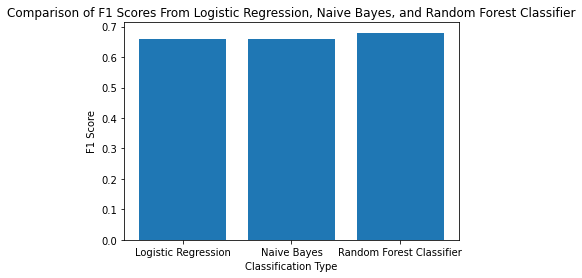

In [118]:
report_log = float(log_report.split()[12])
report_naive = float(naive_report.split()[12])
report_rf = float(rf_report.split()[12])

f1 = [report_log, report_naive, report_rf]
label = ['Logistic Regression', 'Naive Bayes', 'Random Forest Classifier']

plt.bar(label, f1)


plt.title('Comparison of F1 Scores From Logistic Regression, Naive Bayes, and Random Forest Classifier')
plt.ylabel('F1 Score')
plt.xlabel('Classification Type')

plt.show()